In [1]:
import pandas as pd
import numpy as np 


In [2]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, ElasticNet
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, StackingRegressor
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings("ignore")
from feature_engine.encoding import OrdinalEncoder



In [ ]:
data=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
columns=[
    "Row#",
    "clonesize",
    "honeybee",
    "bumbles",
    "andrena",
    "osmia",
    "MaxOfUpperTRange",
    "MinOfUpperTRange",
    "AverageOfUpperTRange",
    "MaxOfLowerTRange",
    "MinOfLowerTRange",
    "AverageOfLowerTRange",
    "RainingDays",
    "AverageRainingDays",
    "fruitset",
    "fruitmass",
    "seeds"
]
data

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,104.0,12.5,0.25,0.25,0.25,0.75,69.7,42.1,58.2,50.2,24.3,41.2,16.00,0.26,0.477941,0.423927,34.043022,6079.08526
1,1,764.0,25.0,0.00,0.00,0.00,0.00,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.334594,0.354415,27.735098,2946.92602
2,2,621.0,25.0,0.50,0.25,0.75,0.63,86.0,52.0,71.9,62.0,30.0,50.8,34.00,0.56,0.468192,0.417915,34.838815,5323.30034
3,3,499.0,25.0,0.50,0.25,0.38,0.75,69.7,42.1,58.2,50.2,24.3,41.2,24.00,0.39,0.500558,0.427431,35.134955,6157.05484
4,4,439.0,12.5,0.25,0.38,0.50,0.75,77.4,46.8,64.7,55.8,27.0,45.8,24.00,0.39,0.520181,0.464067,37.029180,6992.82314
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,661.0,25.0,0.50,0.38,0.38,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.00,0.39,0.489723,0.435764,34.769578,5628.71053
14996,14996,131.0,12.5,0.25,0.25,0.25,0.50,94.6,57.2,79.0,68.2,33.0,55.9,16.00,0.26,0.506988,0.458076,36.362837,6331.86722
14997,14997,444.0,12.5,0.25,0.38,0.50,0.50,77.4,46.8,64.7,55.8,27.0,45.8,1.00,0.10,0.615612,0.514570,45.718182,8413.65966
14998,14998,461.0,12.5,0.25,0.25,0.38,0.75,69.7,42.1,58.2,50.2,24.3,41.2,16.00,0.26,0.551234,0.463896,38.130192,6620.09877


## Ustunlar
1. id: Har bir kuzatish uchun noyob identifikator.
2. Row#: Jadvaldagi qatordan tartib raqami (odatda har bir kuzatish uchun ishlatiladi).
3. clonesize: O‘simlik klonining o‘lchami, ya’ni o‘simlik guruhidagi nusxalarning hajmi. Bu hosildorlik va boshqa o‘zgaruvchilar bilan bog‘liq bo‘lishi mumkin.
4. honeybee: Changlanishda qatnashgan asalari soni yoki ularning changlanish jarayonidagi faollik darajasi.
5. bumbles: Changlanishda qatnashgan bumblebees (yirik asalarilar) soni yoki faolligi.
6. andrena: Andrena turiga mansub yovvoyi asalarilar soni yoki faolligi (changlatuvchi sifatida qanchalik faol ekani).
7. osmia: Osmia turiga kiruvchi asalarilar (ko‘pincha mayda yovvoyi asalarilar) soni yoki changlanishdagi faolligi.
8. MaxOfUpperTRange: Kuzatish davridagi yuqori harorat oralig‘idagi maksimal harorat.
9. MinOfUpperTRange: Yuqori harorat oralig‘idagi minimal harorat.
10. AverageOfUpperTRange: Yuqori harorat oralig‘ining o‘rtacha qiymati.
11. MaxOfLowerTRange: Past harorat oralig‘idagi maksimal harorat.
12. MinOfLowerTRange: Past harorat oralig‘idagi minimal harorat.
13. AverageOfLowerTRange: Past harorat oralig‘ining o‘rtacha qiymati.
14. RainingDays: Kuzatish davridagi yomg‘irli kunlar soni.
15. AverageRainingDays: Yomg‘irli kunlarning o‘rtacha qiymati (ma'lum bir davr mobaynida).
16. fruitset: Meva shakllanish darajasi, ya’ni o‘simliklarda qanchalik meva hosil bo‘lganligi (foiz yoki son).
17. fruitmass: Mevaning o‘rtacha massasi yoki hajmi.
18. seeds: Meva ichidagi urug‘lar soni, bu ko‘pincha hosilning sifatini va hajmini aniqlashga yordam beradi.
19. yield: Hosilning umumiy hajmi yoki og‘irligi, o‘lchov birligi hududga qarab (masalan, gektar) o‘zgarishi mumkin.

In [4]:
data.shape

(15000, 19)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15000 non-null  int64  
 1   Row#                  15000 non-null  float64
 2   clonesize             15000 non-null  float64
 3   honeybee              15000 non-null  float64
 4   bumbles               15000 non-null  float64
 5   andrena               15000 non-null  float64
 6   osmia                 15000 non-null  float64
 7   MaxOfUpperTRange      15000 non-null  float64
 8   MinOfUpperTRange      15000 non-null  float64
 9   AverageOfUpperTRange  15000 non-null  float64
 10  MaxOfLowerTRange      15000 non-null  float64
 11  MinOfLowerTRange      15000 non-null  float64
 12  AverageOfLowerTRange  15000 non-null  float64
 13  RainingDays           15000 non-null  float64
 14  AverageRainingDays    15000 non-null  float64
 15  fruitset           

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error as MAE

# Load your data
# df = pd.read_csv('your_data.csv')

# Data cleaning
data.dropna(inplace=True)  # Example: drop missing values

# Feature engineering
data['TotalPollinators'] = data['honeybee'] + data['bumbles'] + data['andrena'] + data['osmia']
data['FruitMassPerSeed'] = data['fruitmass'] / (data['seeds'] + 1)  # Avoid division by zero
columns=[
    "Row#",
    "clonesize",
    "honeybee",
    "bumbles",
    "andrena",
    "osmia",
    "MaxOfUpperTRange",
    "MinOfUpperTRange",
    "AverageOfUpperTRange",
    "MaxOfLowerTRange",
    "MinOfLowerTRange",
    "AverageOfLowerTRange",
    "RainingDays",
    "AverageRainingDays",
    "fruitset",
    "fruitmass",
    "seeds",
    "FruitMassPerSeed",
    "TotalPollinators"
]
# Select features and target
features = data[columns]
target = data["yield"]

# Normalize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Train a model
model = RandomForestRegressor(n_estimators=267, max_depth=8, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = MAE(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 244.36143344953715


In [7]:
data.describe()

,id,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,...,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield,TotalPollinators,FruitMassPerSeed
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,...,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,7499.500000,427.577533,19.773500,0.388500,0.284573,0.486751,0.591612,82.245667,49.719033,68.717353,...,28.686927,48.611360,18.804700,0.327261,0.501015,0.445967,36.115335,6022.687345,1.751437,0.012058
std,4330.271354,214.127422,6.644451,0.390162,0.058855,0.147560,0.144194,9.104125,5.519865,7.606632,...,3.180584,5.371006,11.880294,0.166934,0.077379,0.038092,4.121393,1362.796312,0.460308,0.000519
min,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,56.800000,...,24.300000,30.000000,1.000000,0.060000,0.029066,0.217545,22.079199,1637.704020,0.000000,0.006391
25%,3749.750000,247.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,...,27.000000,45.800000,16.000000,0.260000,0.451083,0.418220,33.239806,5124.854900,1.630000,0.011738
50%,7499.500000,469.000000,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,...,30.000000,50.800000,16.000000,0.260000,0.506225,0.446518,36.040675,6107.382470,1.760000,0.012035
75%,11249.250000,598.000000,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,...,30.000000,50.800000,24.000000,0.390000,0.564795,0.472271,39.099614,7028.673500,2.000000,0.012347
max,14999.000000,777.000000,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,...,33.000000,62.000000,34.000000,0.560000,0.960586,0.645475,46.369344,8969.401840,19.014000,0.016957


In [8]:
data.nunique()

id                      15000
Row#                      776
clonesize                   6
honeybee                    7
bumbles                     9
andrena                    10
osmia                      13
MaxOfUpperTRange            6
MinOfUpperTRange            7
AverageOfUpperTRange        6
MaxOfLowerTRange            5
MinOfLowerTRange            5
AverageOfLowerTRange        9
RainingDays                 5
AverageRainingDays          6
fruitset                 1084
fruitmass                1112
seeds                    1233
yield                     777
TotalPollinators           44
FruitMassPerSeed        12866
dtype: int64

In [9]:
data.value_counts()

id     Row#   clonesize  honeybee  bumbles  andrena  osmia  MaxOfUpperTRange  MinOfUpperTRange  AverageOfUpperTRange  MaxOfLowerTRange  MinOfLowerTRange  AverageOfLowerTRange  RainingDays  AverageRainingDays  fruitset  fruitmass  seeds      yield       TotalPollinators  FruitMassPerSeed
14999  159.0  12.5       0.25      0.25     0.38     0.63   77.4              46.8              64.7                  55.8              27.0              45.8                  24.00        0.39                0.490966  0.442529   35.648221  5305.74363  1.51              0.012075            1
0      104.0  12.5       0.25      0.25     0.25     0.75   69.7              42.1              58.2                  50.2              24.3              41.2                  16.00        0.26                0.477941  0.423927   34.043022  6079.08526  1.50              0.012097            1
1      764.0  25.0       0.00      0.00     0.00     0.00   86.0              52.0              71.9                  62.0    

In [10]:
columns=[
    "Row#",
    "clonesize",
    "honeybee",
    "bumbles",
    "andrena",
    "osmia",
    "MaxOfUpperTRange",
    "MinOfUpperTRange",
    "AverageOfUpperTRange",
    "MaxOfLowerTRange",
    "MinOfLowerTRange",
    "AverageOfLowerTRange",
    "RainingDays",
    "AverageRainingDays",
    "fruitset",
    "fruitmass",
    "seeds",
    "FruitMassPerSeed",
    "TotalPollinators"
]
col=columns
col.append("yield")

In [11]:
data[col].corr()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,FruitMassPerSeed,TotalPollinators,yield
Row#,1.000000,0.552235,0.276507,0.454392,0.418634,0.391170,-0.000752,-0.000782,-0.000800,-0.000771,-0.000648,-0.000664,0.010079,0.008612,-0.029213,-0.030153,-0.037492,0.029246,0.549205,-0.023540
clonesize,0.552235,1.000000,0.281753,0.067231,0.024998,-0.063095,0.014498,0.014312,0.014414,0.014497,0.014524,0.014488,0.180171,0.183720,-0.430690,-0.395877,-0.413282,0.289296,0.235661,-0.414196
honeybee,0.276507,0.281753,1.000000,-0.032568,0.021704,-0.024215,0.004320,0.004257,0.004332,0.004324,0.004329,0.004151,0.041167,0.030145,-0.109703,-0.103309,-0.110824,0.082183,0.842818,-0.107869
bumbles,0.454392,0.067231,-0.032568,1.000000,-0.123922,0.174074,-0.010827,-0.010498,-0.010341,-0.010648,-0.010537,-0.010029,-0.084582,-0.081813,0.173703,0.174824,0.180868,-0.118381,0.115059,0.177281
andrena,0.418634,0.024998,0.021704,-0.123922,1.000000,0.341832,-0.009516,-0.009735,-0.009959,-0.009926,-0.009756,-0.010254,-0.041906,-0.043045,0.129153,0.111332,0.112469,-0.078533,0.430200,0.122463
osmia,0.391170,-0.063095,-0.024215,0.174074,0.341832,1.000000,-0.011543,-0.011632,-0.011405,-0.011527,-0.011476,-0.011951,-0.095874,-0.095683,0.278504,0.256177,0.258819,-0.173735,0.424569,0.271989
MaxOfUpperTRange,-0.000752,0.014498,0.004320,-0.010827,-0.009516,-0.011543,1.000000,0.999475,0.999327,0.999657,0.999738,0.998303,-0.001452,-0.002587,0.026773,0.149095,0.066244,0.130158,-0.004389,-0.004252
MinOfUpperTRange,-0.000782,0.014312,0.004257,-0.010498,-0.009735,-0.011632,0.999475,1.000000,0.999438,0.999538,0.999811,0.998444,-0.001652,-0.002748,0.027175,0.149828,0.066773,0.130238,-0.004499,-0.004008
AverageOfUpperTRange,-0.000800,0.014414,0.004332,-0.010341,-0.009959,-0.011405,0.999327,0.999438,1.000000,0.999456,0.999601,0.998186,-0.001906,-0.003018,0.027631,0.150538,0.067310,0.130234,-0.004416,-0.003666
MaxOfLowerTRange,-0.000771,0.014497,0.004324,-0.010648,-0.009926,-0.011527,0.999657,0.999538,0.999456,1.000000,0.999868,0.998422,-0.001528,-0.002633,0.027062,0.149717,0.066613,0.130441,-0.004490,-0.004082


In [12]:
data[col].corr()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,FruitMassPerSeed,TotalPollinators,yield
Row#,1.000000,0.552235,0.276507,0.454392,0.418634,0.391170,-0.000752,-0.000782,-0.000800,-0.000771,-0.000648,-0.000664,0.010079,0.008612,-0.029213,-0.030153,-0.037492,0.029246,0.549205,-0.023540
clonesize,0.552235,1.000000,0.281753,0.067231,0.024998,-0.063095,0.014498,0.014312,0.014414,0.014497,0.014524,0.014488,0.180171,0.183720,-0.430690,-0.395877,-0.413282,0.289296,0.235661,-0.414196
honeybee,0.276507,0.281753,1.000000,-0.032568,0.021704,-0.024215,0.004320,0.004257,0.004332,0.004324,0.004329,0.004151,0.041167,0.030145,-0.109703,-0.103309,-0.110824,0.082183,0.842818,-0.107869
bumbles,0.454392,0.067231,-0.032568,1.000000,-0.123922,0.174074,-0.010827,-0.010498,-0.010341,-0.010648,-0.010537,-0.010029,-0.084582,-0.081813,0.173703,0.174824,0.180868,-0.118381,0.115059,0.177281
andrena,0.418634,0.024998,0.021704,-0.123922,1.000000,0.341832,-0.009516,-0.009735,-0.009959,-0.009926,-0.009756,-0.010254,-0.041906,-0.043045,0.129153,0.111332,0.112469,-0.078533,0.430200,0.122463
osmia,0.391170,-0.063095,-0.024215,0.174074,0.341832,1.000000,-0.011543,-0.011632,-0.011405,-0.011527,-0.011476,-0.011951,-0.095874,-0.095683,0.278504,0.256177,0.258819,-0.173735,0.424569,0.271989
MaxOfUpperTRange,-0.000752,0.014498,0.004320,-0.010827,-0.009516,-0.011543,1.000000,0.999475,0.999327,0.999657,0.999738,0.998303,-0.001452,-0.002587,0.026773,0.149095,0.066244,0.130158,-0.004389,-0.004252
MinOfUpperTRange,-0.000782,0.014312,0.004257,-0.010498,-0.009735,-0.011632,0.999475,1.000000,0.999438,0.999538,0.999811,0.998444,-0.001652,-0.002748,0.027175,0.149828,0.066773,0.130238,-0.004499,-0.004008
AverageOfUpperTRange,-0.000800,0.014414,0.004332,-0.010341,-0.009959,-0.011405,0.999327,0.999438,1.000000,0.999456,0.999601,0.998186,-0.001906,-0.003018,0.027631,0.150538,0.067310,0.130234,-0.004416,-0.003666
MaxOfLowerTRange,-0.000771,0.014497,0.004324,-0.010648,-0.009926,-0.011527,0.999657,0.999538,0.999456,1.000000,0.999868,0.998422,-0.001528,-0.002633,0.027062,0.149717,0.066613,0.130441,-0.004490,-0.004082


<Axes: ylabel='yield'>

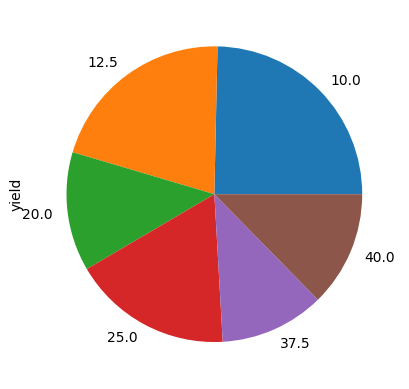

In [13]:
data.groupby("clonesize")["yield"].median().plot(kind="pie")

<Axes: ylabel='Frequency'>

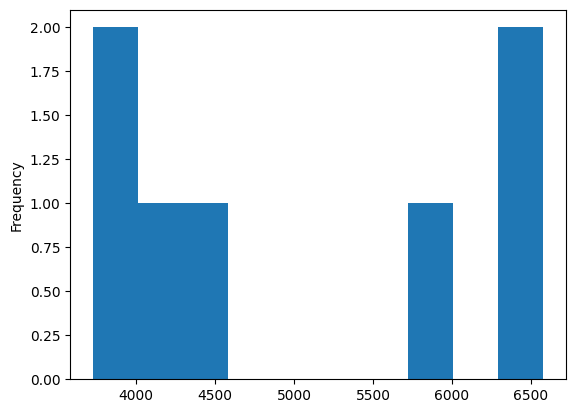

In [14]:
data.groupby("honeybee")["yield"].median().plot(kind="hist")

<Axes: xlabel='bumbles'>

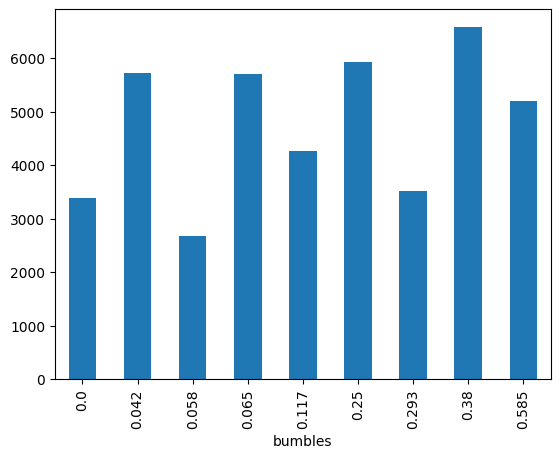

In [15]:
data.groupby("bumbles")["yield"].median().plot(kind="bar")

In [16]:
# def WoE(data, feature_name):
#     df = data.copy()
    
#     woe_table = df.groupby(feature_name)['yield'].value_counts().unstack().rename(columns={1: '# of events', 0: '# of non-events'})
    
#     woe_table['Percentage events'] = woe_table['# of events'] / woe_table['# of events'].sum()
#     woe_table['Percentage non-events'] = woe_table['# of non-events'] / woe_table['# of non-events'].sum()
    
#     woe_table['WoE'] = np.log(woe_table['Percentage events'] / woe_table['Percentage non-events'])
    
#     woe_table['Total Observations'] = woe_table['# of events'] + woe_table['# of non-events']
#     woe_table['Percent of Observations'] = (woe_table['Total Observations'] / woe_table['Total Observations'].sum() * 100).round(3)
#     return woe_table.reset_index()

In [17]:
# def print_WoE(df_woe, col, rotation=45):
#     fig, ax1 = plt.subplots(figsize=(10, 6))
#     ax2 = ax1.twinx()

#     sns.pointplot(data=df_woe, x=col, y='WoE', color='red', linewidth=2, ax=ax1)
#     ax1.set_ylabel('Weight of Evidence (WoE)', color='red')
#     ax1.tick_params(axis='y', colors='red')
#     ax1.set_xlabel(col)

#     ax1.grid(visible=True, which='major', linestyle='--')

#     sns.barplot(data=df_woe, x=col, y='Percent of Observations', alpha=0.3, ax=ax2)
#     ax2.set_ylabel('Rate of Observations')
#     ax2.set_ylim(0, df_woe['Percent of Observations'].max() * 1.2)
#     ax2.axhline(y=5, color='red', linestyle='--', linewidth=1.5)

#     ax1.set_xticklabels(ax1.get_xticklabels(), rotation=rotation)
#     plt.title("WoE change plot")
#     plt.show()

In [18]:
# data['osmia_Cat'] = pd.cut(data['osmia'], bins=[-np.inf, 0, np.inf])
# df_woe = WoE(data, 'osmia_Cat')
# df_woe

In [19]:
# df['Balance_Cat'] = pd.cut(df['Balance'], bins=[-np.inf, 0, np.inf])
# df_woe = WoE(df, 'Balance_Cat')
# df_woe

In [20]:
# print_WoE(df_woe, 'Balance_Cat')

In [21]:
columns=[
    "Row#",
    "clonesize",
    "honeybee",
    "bumbles",
    "andrena",
    "osmia",
    "MaxOfUpperTRange",
    "MinOfUpperTRange",
    "AverageOfUpperTRange",
    "MaxOfLowerTRange",
    "MinOfLowerTRange",
    "AverageOfLowerTRange",
    "RainingDays",
    "AverageRainingDays",
    "fruitset",
    "fruitmass",
    "seeds",
    "FruitMassPerSeed",
    "TotalPollinators"
]
col=[
    "Row#",
    "clonesize",
    "honeybee",
    "bumbles",
    "andrena",
    "osmia",
    # "MaxOfUpperTRange",
    # "MinOfUpperTRange",
    # "AverageOfUpperTRange",
    # "MaxOfLowerTRange",
    # "MinOfLowerTRange",
    # "AverageOfLowerTRange",
    "RainingDays",
    "AverageRainingDays",
    "fruitset",
    "fruitmass",
    "seeds",
    "FruitMassPerSeed",
    "TotalPollinators"
]
col.append("yield")
columns

['Row#',
 'clonesize',
 'honeybee',
 'bumbles',
 'andrena',
 'osmia',
 'MaxOfUpperTRange',
 'MinOfUpperTRange',
 'AverageOfUpperTRange',
 'MaxOfLowerTRange',
 'MinOfLowerTRange',
 'AverageOfLowerTRange',
 'RainingDays',
 'AverageRainingDays',
 'fruitset',
 'fruitmass',
 'seeds',
 'FruitMassPerSeed',
 'TotalPollinators']

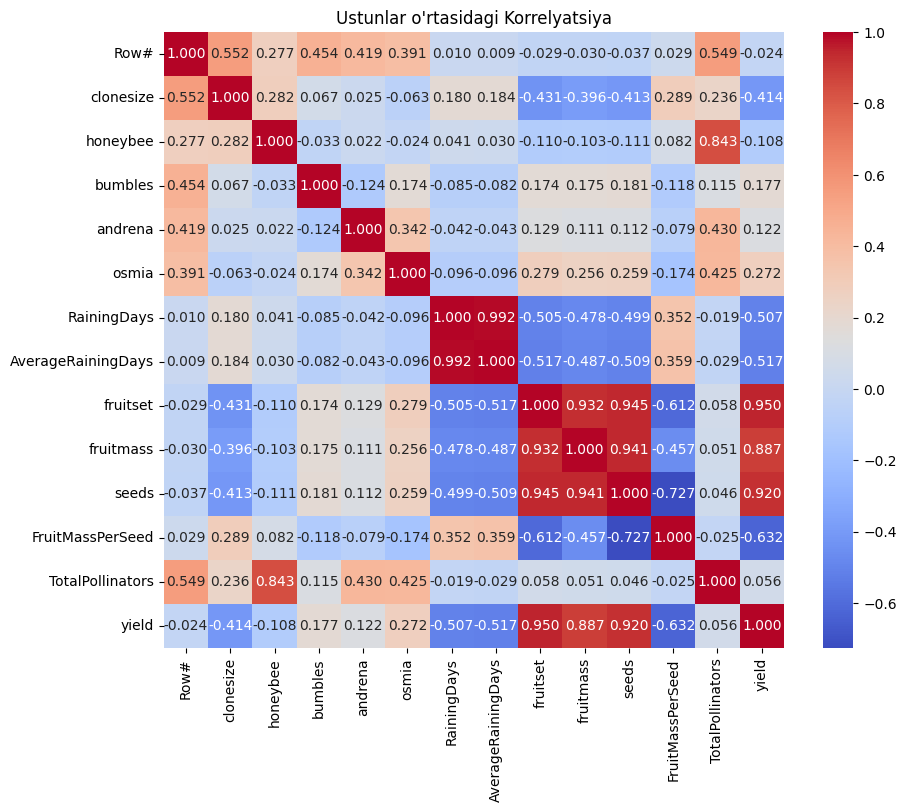

In [22]:
korrelyatsiya = data[col].corr()
import matplotlib.pyplot as plt
# Korrelyatsiya matritsasini ko'rsatish
plt.figure(figsize=(10, 8))
sns.heatmap(korrelyatsiya, annot=True, cmap='coolwarm', fmt='.3f')
plt.title('Ustunlar o\'rtasidagi Korrelyatsiya')
plt.show()

In [23]:
# import optuna
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# X=data[columns]
# y=data["yield"]
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# def objective(trial):
#     n_estimators = trial.suggest_int('n_estimators', 10, 400)
#     max_depth = trial.suggest_int('max_depth', 1, 60)
#     model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth)
#     model.fit(X_train, y_train)
#     y_pred = model.predict(X_test)
#     mae = MAE(y_test, y_pred)
#     return mae
# study = optuna.create_study(direction='minimize')  
# study.optimize(objective, n_trials=200)
# print('Eng yaxshi giperparametrlar:', study.best_params)
# print('Eng yaxshi MAE:', study.best_value)

In [24]:
columns=[
    "Row#",
    "clonesize",
    "honeybee",
    "bumbles",
    "andrena",
    "osmia",
    # "MaxOfUpperTRange",
    # "MinOfUpperTRange",
    # "AverageOfUpperTRange",
    # "MaxOfLowerTRange",
    # "MinOfLowerTRange",
    # "AverageOfLowerTRange",
    "RainingDays",
    "AverageRainingDays",
    "fruitset",
    "fruitmass",
    "seeds",
    "FruitMassPerSeed",
    "TotalPollinators"
]
X=data[columns]
y=data["yield"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=324, max_depth=8)
model.fit(X_train, y_train) 
y_pred = model.predict(X_test)
mae = MAE(y_test, y_pred)
print(mae)


245.6292222828706


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
base_models = [
    ('rf', RandomForestRegressor(n_estimators=324, max_depth=8, random_state=42)),
    ('lr', LinearRegression()),
    ('svr', SVR(kernel='rbf', C=1.0, epsilon=0.1)),  # Changed kernel to rbf
    ('knn', KNeighborsRegressor(n_neighbors=5)),  # KNN model
    ('xgb', XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)),  # XGBoost model
    ('lgbm', LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)),  # LightGBM model
     ('dt', DecisionTreeRegressor(max_depth=5, random_state=42))
]


# Define the stacking regressor
stacked_model = StackingRegressor(
    estimators=base_models,
    final_estimator=ElasticNet(alpha=0.1, l1_ratio=0.5)  # Using ElasticNet as final estimator
)

# Fit the stacking model
stacked_model.fit(X_train, y_train)

# Make predictions
y_pred = stacked_model.predict(X_test)

# Evaluate the model
mae = MAE(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

  File "c:\Users\Nurbek\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000825 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1346
[LightGBM] [Info] Number of data points in the train set: 12000, number of used features: 13
[LightGBM] [Info] Start training from score 6020.890122
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000764 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1345
[LightGBM] [Info] Number of data points in the train set: 9600, number of used features: 13
[LightGBM] [Info] Start training from score 6020.052956
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000811 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1345
[LightGBM] [Info] Number of data points in the trai

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error as MAE

# Data cleaning
data.dropna(inplace=True)  # Example: drop missing values

# Feature engineering for training data
data['TotalPollinators'] = data['honeybee'] + data['bumbles'] + data['andrena'] + data['osmia']
data['FruitMassPerSeed'] = data['fruitmass'] / (data['seeds'] + 1)  # Avoid division by zero

# Feature engineering for test data
test['TotalPollinators'] = test['honeybee'] + test['bumbles'] + test['andrena'] + test['osmia']
test['FruitMassPerSeed'] = test['fruitmass'] / (test['seeds'] + 1)  # Avoid division by zero

# Define columns to use
columns = [
    "Row#",
    "clonesize",
    "honeybee",
    "bumbles",
    "andrena",
    "osmia",
    "MaxOfUpperTRange",
    "MinOfUpperTRange",
    "AverageOfUpperTRange",
    "MaxOfLowerTRange",
    "MinOfLowerTRange",
    "AverageOfLowerTRange",
    "RainingDays",
    "AverageRainingDays",
    "fruitset",
    "fruitmass",
    "seeds",
    "FruitMassPerSeed",
    "TotalPollinators"
]

# Select features and target
features = data[columns]
target = data["yield"]

# Normalize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

# Train a model
model = RandomForestRegressor(n_estimators=200,
        max_depth=10,
        min_samples_split=9,
        min_samples_leaf=6,
        random_state=42)
model.fit(X_train, y_train)

# Make predictions using the scaled test features
y_pred = model.predict(X_test)  # Use X_test directly since it's already scaled

mae = MAE(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 243.75544887318065


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import optuna



# Ma'lumotlarni trening va test setlariga ajratish
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Optuna uchun maqsad funksiyasini aniqlash
def objective(trial):
    # Hyperparameterlarni tanlash
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 10, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    
    # Modelni yaratish
    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    
    # Kross-valyasiya qilish
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error').mean()
    
    return -score

# Optuna study yaratish va hyperparameterlarni optimallashtirish
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Eng yaxshi parametrlarga ega bo'lgan modelni yaratish
best_params = study.best_params
best_model = RandomForestRegressor(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Test setiga nisbatan bashorat qilish
y_pred = best_model.predict(X_test)

# MAE ni hisoblash
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')
print(f'Best Parameters: {best_params}')                                                          


In [ ]:
# Mean Absolute Error: 243.61689992687616
# Best Parameters: {'n_estimators': 265, 'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 6}

In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler

# 1. Ma'lumotni yuklash
X = data.drop(columns=["yield"])
y = data["yield"]

# 2. Ma'lumotni ajratish
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Modelni qurish va sozlash
model = RandomForestRegressor()
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 15, 20],
}
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(X_train, y_train)

# 5. Eng yaxshi modelni tanlash
best_model = grid_search.best_estimator_

# 6. Bashorat va MAEni hisoblash
y_pred = best_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print("Eng yaxshi parametrlar:", grid_search.best_params_)
print("MAE:", mae)


Eng yaxshi parametrlar: {'max_depth': 10, 'n_estimators': 200}
MAE: 246.1864892438829


In [36]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
columns=[
    "Row#",
    "clonesize",
    "honeybee",
    "bumbles",
    "andrena",
    "osmia",
    "MaxOfUpperTRange",      
    "MinOfUpperTRange",
    "AverageOfUpperTRange",
    "MaxOfLowerTRange",
    "MinOfLowerTRange",
    "AverageOfLowerTRange",
    "RainingDays",
    "AverageRainingDays",
    "fruitset",
    "fruitmass",
    "seeds",
    "FruitMassPerSeed",
    "TotalPollinators"
]
model = RandomForestRegressor(
        n_estimators=200,
        max_depth=10,
        min_samples_split=9,
        min_samples_leaf=6,
        random_state=42
    )
model.fit(X_train, y_train)
y_pred =model.predict(test[columns]) 
sub = pd.read_csv('sample_submission.csv')
sub['yield'] = y_pred
sub.to_csv('Sample.csv', index=False)
sub 

,id,yield
0,15000,8076.886058
1,15001,8086.863131
2,15002,8071.908022
3,15003,8076.886058
4,15004,8066.911306
...,...,...
9995,24995,8091.859847
9996,24996,8083.552053
9997,24997,8090.194968
9998,24998,8090.194968
